# Visualización y análisis de dataset de MiBici de Guadalajara, México

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, date

# setting matplot lib styles
mpl.style.use('bmh')

# loading our dataset
df_mibici = pd.read_csv('../../challenge_one/datasets/mibici_trips_march_2023.csv')
display(df_mibici[['Genero', 'Anio_de_nacimiento', 'origen_name', 'destino_name']].head())

,Genero,Anio_de_nacimiento,origen_name,destino_name
0,M,1987.0,(GDL-078) C. Comercio / C. La Paz,(GDL-037) C.Juan N. Cumplido /C. Independenci
1,M,1987.0,(GDL-078) C. Comercio / C. La Paz,(GDL-037) C.Juan N. Cumplido /C. Independenci
2,F,1989.0,(GDL-078) C. Comercio / C. La Paz,(GDL-037) C.Juan N. Cumplido /C. Independenci
3,M,1979.0,(GDL-078) C. Comercio / C. La Paz,(GDL-037) C.Juan N. Cumplido /C. Independenci
4,F,1989.0,(GDL-078) C. Comercio / C. La Paz,(GDL-037) C.Juan N. Cumplido /C. Independenci


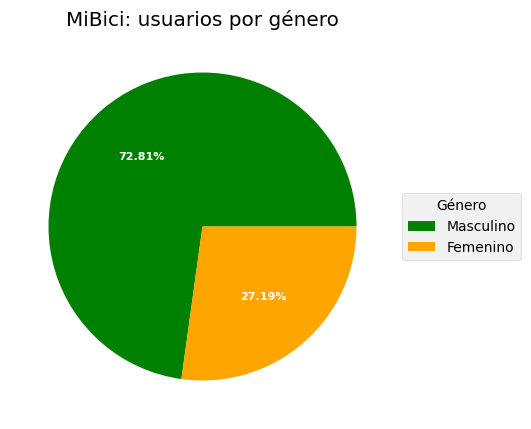

In [72]:
# count users by gender
users_by_gender = df_mibici['Genero'].value_counts()

# pie plot to see the gender distribution of our users
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw=dict(aspect="equal"))

wedges, texts, autotexts = ax.pie(
    users_by_gender, 
    labels = ['Masculino', 'Femenino'],  
    autopct='%1.2f%%',
    colors=['green', 'orange'],
    textprops=dict(color="w")
)

ax.legend(wedges, ["Masculino", "Femenino"], title="Género", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("MiBici: usuarios por género")
plt.show()

Como podemos observar en el grafico anterior, los usuarios de genero `masculino` son la mayoria, esto puede deberse a diferentes razones; 
* ¿Qué acciones podriamos tener para fomentar/incentivar el uso de la bicicleta como medio de transporte entre los usuarios de género `femenino`?
* ¿Cuáles son las razones por las que los usuarios de género`femenino` prefieren otros medios de transporte en vez de usar la bicicleta?
* ¿Es la inseguridad y acoso hacia el género `femenino` una de las razones por las que prefieren otros medios de transporte?

,Anio_de_nacimiento,edad
0,1987.0,36.0
1,1987.0,36.0
2,1989.0,34.0
3,1979.0,44.0
4,1989.0,34.0


Text(0, 0.5, 'Cantidad de usuarios')

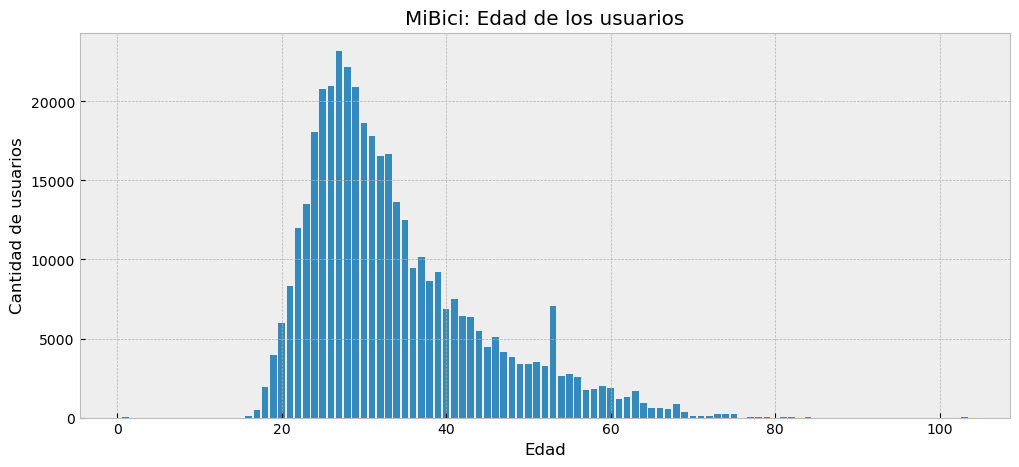

In [73]:
# getting current year to calculate user's ages
now = datetime.now()
current_year = now.year

# calculate user's age and add it to dataframe
df_mibici["edad"] = current_year - df_mibici["Anio_de_nacimiento"]
ages_count = df_mibici["edad"].value_counts(sort=True)
display(df_mibici[["Anio_de_nacimiento", "edad"]].head())

# bar plot to see the user's age distribution
fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(ages_count.index, ages_count)
ax.set_title('MiBici: Edad de los usuarios')
ax.set_xlabel('Edad')
ax.set_ylabel('Cantidad de usuarios')

Se realizó un conteo de usuarios por edad y se generó el gráfico de dicho conteo, como resultado podemos observar lo siguiente:
* La mayoría de los usuarios ronda entre los **20 y 40 años de edad**.
* El segundo gran grupo ronda netre los **40 y 60 años de edad**.
* Muy pocos usuarios son menores de **18 años**, tal vez el _costo_ y _seguridad_ pueda ser un factor en la baja adopcion entre los menores de edad.
* Identificamos que tenemos **valores atípicos (outlier values)** en las edades, se pueden visualizar en ambos extremos de la grafica, usuarios con mas de 100 años de edad, y tambien con menos de 3 años de edad, tal vez deberíamos analizar estos valores usando un boxplot para descargar esos valores atípicos


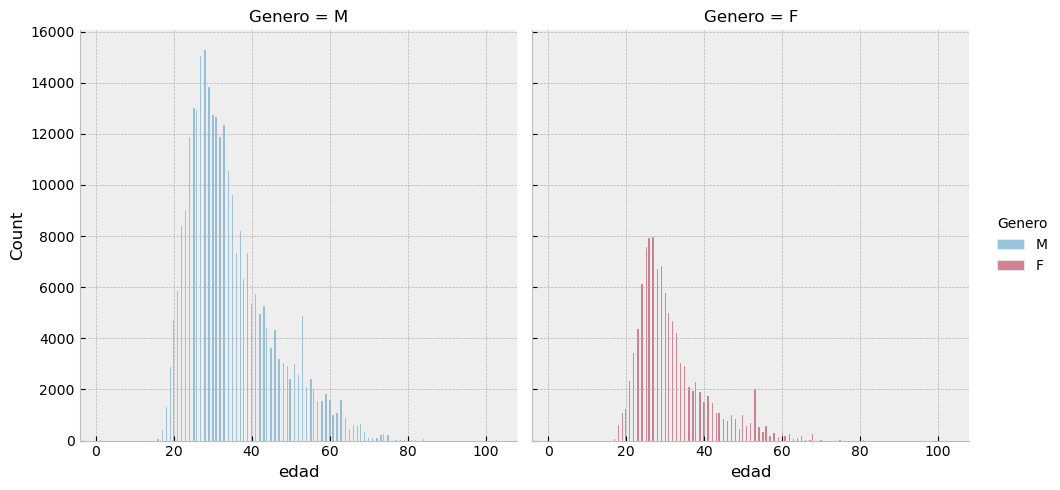

In [74]:
# barplot to compare user's ages between genders
sns.displot(data=df_mibici, x="edad", hue="Genero", col="Genero")

En este gráfico analizamos las edades de los usuarios pero separadas por género y podemos identificar lo siguiente:
* En ambos géneros la `mayor cantidad` de usuarios coincide entre los **20 y 40** años.
* En el case del genero `femenino`, vemos una `disminucion` considerable de usuarios entre los **40 y 60** años.
* Los usuarios entre los **40 y 60** años `masculinos` **duplican** a los `femeninos` en el mismo rango de edad.

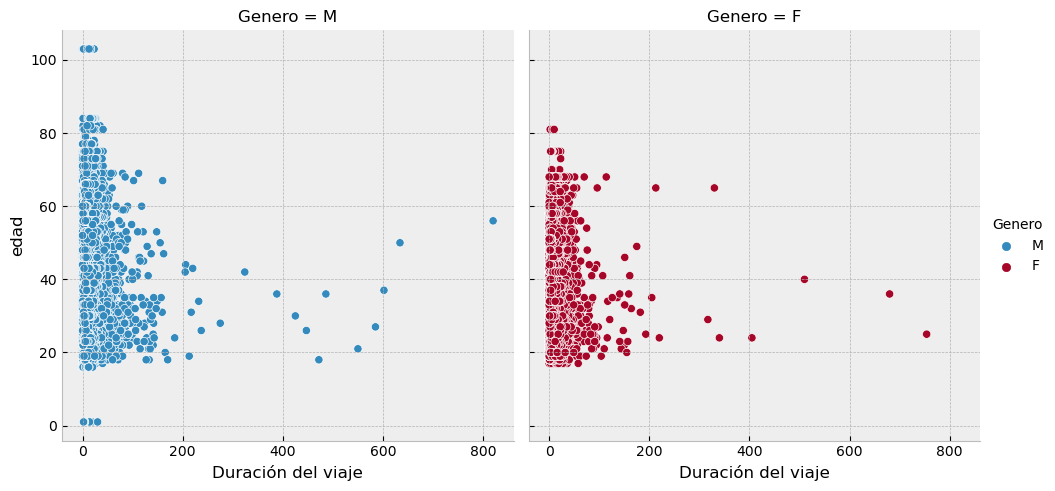

In [75]:
# convert raw trip dates to datetime objects
df_mibici['Inicio_del_viaje_date'] = pd.to_datetime(df_mibici['Inicio_del_viaje'], format='%d/%m/%y %H:%M')
df_mibici['Fin_del_viaje_date'] = pd.to_datetime(df_mibici['Fin_del_viaje'], format='%d/%m/%y %H:%M')

# calculate ride time
df_mibici["duracion_viaje"] = (df_mibici["Fin_del_viaje_date"] - df_mibici['Inicio_del_viaje_date']) / pd.Timedelta(minutes=1)

# show relation between ride time and users' age
ax = sns.relplot(data=df_mibici, x="duracion_viaje", y="edad", hue="Genero", col="Genero")
ax.set_xlabels("Duración del viaje")

In [76]:
df_mibici.groupby(["Genero"])["duracion_viaje"].agg('mean')

Genero
F    10.884328
M    10.561184
Name: duracion_viaje, dtype: float64

Como podemos observar en el gráfico anterior el promedio de **duración de un viaje** en ambos géneros es muy **similar**, con una duración un poco **mayor** en el genéro _masculino_ en el rango de los **20 a los 40 años**, pero muy **similar** en _ambos géneros_ entre los **40 y 60 años**, viendo una **disminución** considerable en el género _femenino_ apartir de los **60 años**

La **media** de duración de un viaje es muy similar enter ambos géneros, aunque tenemos varios valores atípicos los cuales pueden deberse a varias razones, por ejemplo cuando el sistema no finaliza un viaje, o algun usuario olvida terminar el viaje, o por errores en el sistema, es por eso que es importante descartar estos valores atípicos en un futuro para tener una media mas exacta para ambos géneros.

Text(0, 0.5, '')

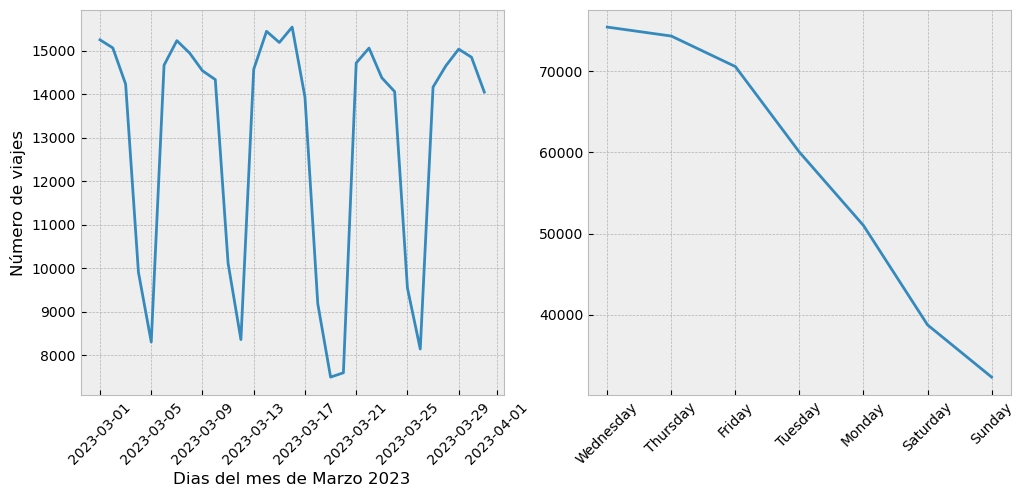

In [77]:
trips_sorted = df_mibici.sort_values(by="Inicio_del_viaje_date", ascending=True)

trips_by_day = df_mibici["Inicio_del_viaje_date"].dt.day_name().value_counts()
trips_by_month_day = df_mibici.groupby(
    pd.Grouper(key="Inicio_del_viaje_date", freq='1D')
).size()


# using lineplot to show number of trips per day
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))


ax_trips_by_month_day = sns.lineplot(data=trips_by_month_day, ax=ax[0])
ax_trips_by_month_day.tick_params(axis='x', labelrotation = 45)
ax[0].set_xlabel("Dias del mes de Marzo 2023")
ax[0].set_ylabel("Número de viajes")

ax_trips_by_day = sns.lineplot(data=trips_by_day, ax=ax[1])
ax_trips_by_day.tick_params(axis='x', labelrotation = 45)
ax[1].set_ylabel("")



Como podemos observar en los gráficos de arriba, podemos concluir:
* La **mayoría** de los viajes en bici ocurren entre semana principalmente a **mitad de semana**
* Los **fines de semana** parecen ser los días que los usuarios **no usan tanto el servicio**, puede deberse a que mayormente lo usan para trasladarse a sus trabajos entre semana.
* El **mayor uso del servicio ocurre del Miércoles al Viernes**, al final de la semana laboral.

Text(0, 0.5, 'Edad')

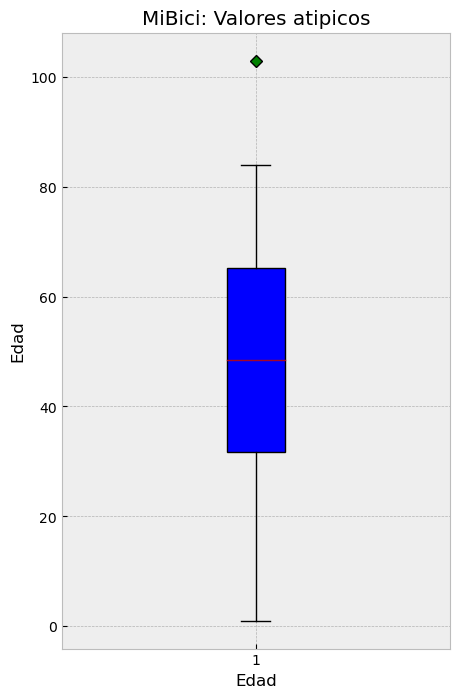

In [78]:
# box plot to identify outliers
fig, ax = plt.subplots(figsize=(5, 8))
ax.boxplot(
    ages_count.index, 
    patch_artist=True, 
    flierprops=dict(markerfacecolor='g', marker='D'), 
    whis=1
)
ax.set_title('MiBici: Valores atipicos')
ax.set_xlabel('Edad')
ax.set_ylabel('Edad')

En la gráfica anterior podemos detectar algunos valores atípicos en nuestro dataset, podemos inferir:  
* El usuario registro mal su fecha de nacimiento, por esta razon se muestra este valor atípico
* No deberíamos considerar estos valores atípicos en nuestro dataset, ya que pueden afectar en el calculo de variables de estadística